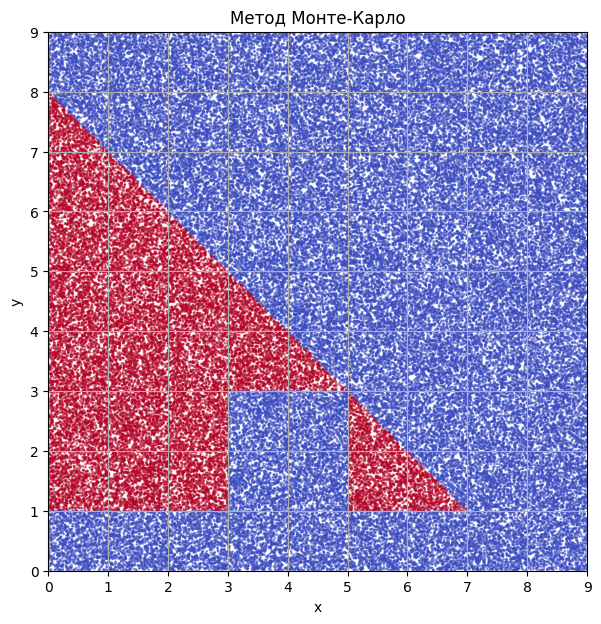

Теоретическая площадь: 20.5
Оцененная площадь (Монте-Карло): 20.4703
Кол-во итераций: 100000
Относительная ошибка: 0.1448%


In [3]:
# Импорт библиотек numpy и matplotlib:
import numpy as np
import matplotlib.pyplot as plt

# Условия принадлежности области:
def is_inside_triangle(x, y):
    return (y > 1) & (y < (-x + 8)) & (x > 0) & (x < 8)

def is_inside_cutout(x, y):
    return (x >= 3) & (x <= 5) & (y >= 1) & (y <= 3)

# Метод Монте-Карло:
def monte_carlo_area(N, x_min, x_max, y_min, y_max):
    x_rand = np.random.uniform(x_min, x_max, N)
    y_rand = np.random.uniform(y_min, y_max, N)

    # Основная фигура за исключением выреза:
    inside = (is_inside_triangle(x_rand, y_rand) & 
              (~is_inside_cutout(x_rand, y_rand)))
    
    # Расчёт площади:
    square_area = (x_max - x_min) * (y_max - y_min)
    fraction = np.sum(inside) / N
    area_estimate = square_area * fraction

    return area_estimate, x_rand, y_rand, inside

# Настройки области графика:
N = int(1e5)
x_min, x_max = 0, 9
y_min, y_max = 0, 9

# Запуск метода:
S_mk, x_r, y_r, inside_pts = monte_carlo_area(N, x_min, x_max, 
                                              y_min, y_max)

# Теоретическая площадь:
S_triangle = 7 * 7 / 2
S_cutout = 2 * 2
S_true = S_triangle - S_cutout

# Визуализация:
plt.figure(figsize=(7, 7))
plt.scatter(x_r, y_r, c=inside_pts, cmap="coolwarm", s=1, alpha=0.5)
plt.title(f"Метод Монте-Карло")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(True)
plt.show()

# Оценка погрешности метода:
print(f"Теоретическая площадь: {S_true}")
print(f"Оцененная площадь (Монте-Карло): {S_mk:.4f}")
print(f"Кол-во итераций: {N}")
print(f"Относительная ошибка: {abs(S_mk - S_true)/S_true * 100:.4f}%")

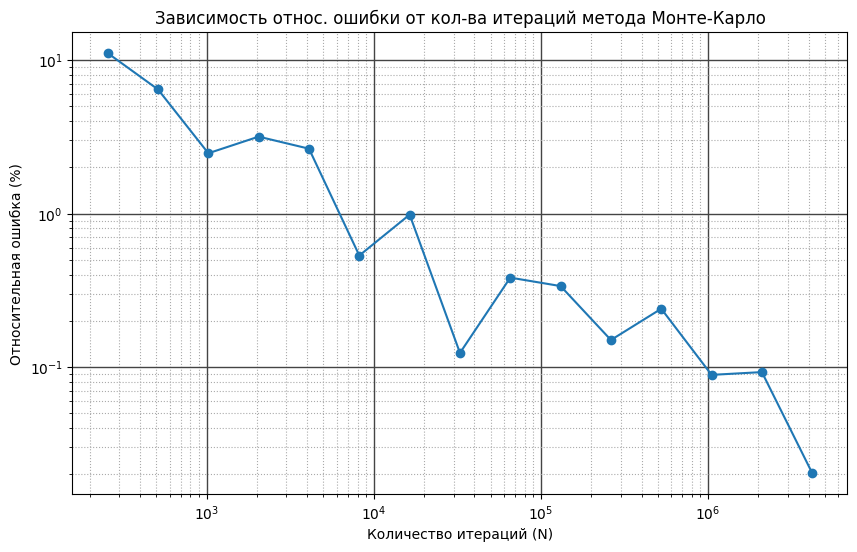

In [2]:
# Оценка зависимости между погрешностью и кол-вом итераций:
# Метод Монте-Карло:
def monte_carlo_P(N):
    x_rand = np.random.uniform(0, 7, N)
    y_rand = np.random.uniform(1, 8, N)

    # Основная фигура за исключением выреза:
    is_inside = np.where((is_inside_triangle(x_rand, y_rand) & 
              (~is_inside_cutout(x_rand, y_rand))))
    
    P = len(is_inside[0])
    return P
    
N_values = [2**i for i in range(8, 22+1)] 
epsilons = [] # пустой список из величин погрешностей 
P = 0 
total_N = 0 

for N in N_values: 
    new_N = N - total_N # кол-во новых точек 
    P += monte_carlo_P(new_N)
    total_N += new_N # добавление к общему кол-ву точек 
    S_N = P / total_N * 49 # оценка площади
    epsilon = (abs(S_N - S_true) / S_true) * 100
    epsilons.append(epsilon)

plt.figure(figsize=(10, 6)) 
plt.plot(N_values, epsilons, marker="o") 
plt.xscale("log") 
plt.yscale("log") 
plt.xlabel("Количество итераций (N)") 
plt.ylabel("Относительная ошибка (%)") 
plt.title("Зависимость относ. ошибки от кол-ва итераций метода Монте-Карло") 
plt.minorticks_on() # мелкая сетка на лог. масштабе 
plt.grid(True, which="major", color = "#444", linewidth = 1) 
plt.grid(True, which="minor", color="#aaa", ls=":") 
plt.show()


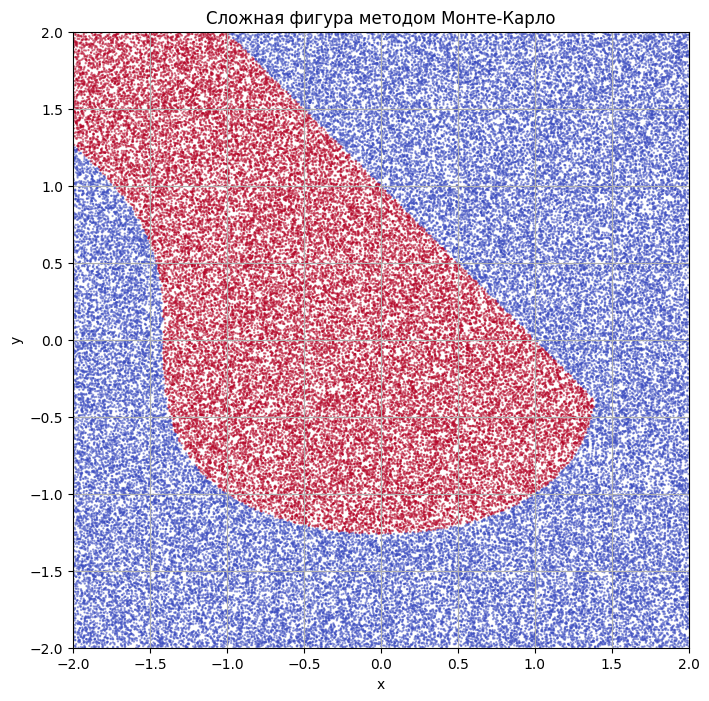

Теоретическая площадь: 6.37517
Оцененная площадь (Монте-Карло): 6.3784
Кол-во итераций: 100000
Относительная ошибка: 0.0507%


In [10]:
# Импорт библиотек numpy и matplotlib:
import numpy as np
import matplotlib.pyplot as plt

# Количество итераций:
N = 10**5

# Границы прямоугольной области:
x_min, x_max = -2, 2
y_min, y_max = -2, 2

# Условия принадлежности сложной области:
def is_inside(x, y):
    return (x**2 - y**3 < 2) & (x + y < 1)

# Метод Монте-Карло:
def monte_carlo_area(N):
    x_rand = np.random.uniform(x_min, x_max, N)
    y_rand = np.random.uniform(y_min, y_max, N)
    
    inside = is_inside(x_rand, y_rand)
    area_rectangle = (x_max - x_min) * (y_max - y_min)
    area_estimate = area_rectangle * np.sum(inside) / N
    
    return area_estimate, x_rand, y_rand, inside

# Запуск метода:
S_mk, x_rand, y_rand, inside = monte_carlo_area(N)
S_true = 6.37517

# Визуализация - скаттерограмма точек:
plt.figure(figsize=(8, 8))
plt.scatter(x_rand, y_rand, c=inside, cmap="coolwarm", s=0.5, alpha=0.5)
plt.title("Сложная фигура методом Монте-Карло")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.gca().set_aspect("equal", adjustable="box")
plt.grid(True)
plt.show()

# Отображение результатов:
print(f"Теоретическая площадь: {S_true}")
print(f"Оцененная площадь (Монте-Карло): {S_mk:.4f}")
print(f"Кол-во итераций: {N}")
print(f"Относительная ошибка: {abs(S_mk - S_true)/S_true * 100:.4f}%")